# Import library

In [2]:
from protendido import obj_ic_jack_priscilla, new_obj_ic_jack_priscilla
from metapy_toolbox import metaheuristic_optimizer
from easyplot_toolbox import line_chart, histogram_chart, scatter_chart, bar_chart

# Setup and call function

In [3]:
import pandas as pd
lambda_list = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
results = []

for lambda_value in lambda_list:
    print(f'Lambda: {lambda_value}')
    variaveis_proj = {
                            'g (kN/m)': 10.0,
                            'q (kN/m)': 5.00,
                            'l (m)': 7,
                            'tipo de seção': 'retangular',
                            'tipo de protensão': 'Parcial',
                            'fck,ato (kPa)': 21E3,
                            'fck (kPa)': 50E3,
                            'lambda': lambda_value,
                            'penalidade': 1E6,
                            'fator de fluência': 2.5,
                            'flecha limite de fabrica (m)': 7/1000,
                            'flecha limite de serviço (m)': 7/250
                        }
    algorithm_setup = {   
                'number of iterations': 200,
                'number of population': 10,
                'number of dimensions': 4,
                'x pop lower limit': [100, 0.10, 0.05, 0.05],
                'x pop upper limit': [1000, 2.0, 2.0, 2.0],
                'none variable': variaveis_proj,
                'objective function': obj_ic_jack_priscilla,
                'algorithm parameters': {
                                        'selection': {'type': 'roulette'},
                                        'crossover': {'crossover rate (%)': 82, 'type':'linear'},
                                        'mutation': {'mutation rate (%)': 12, 'type': 'hill climbing', 'cov (%)': 15, 'pdf': 'gaussian'},
                                        }
            }

    # METApy settings
    general_setup = {   
                'number of repetitions': 30,
                'type code': 'real code',
                'initial pop. seed': [None] * 30,
                'algorithm': 'genetic_algorithm_01',
            }
    df_all_reps, df_resume_all_reps, reports, status = metaheuristic_optimizer(algorithm_setup, general_setup)
    print(df_resume_all_reps[status])
    best_result_row = df_resume_all_reps[status].iloc[-1]
    of, g = new_obj_ic_jack_priscilla([best_result_row['X_0_BEST'], 
                                       best_result_row['X_1_BEST'], 
                                       best_result_row['X_2_BEST'], 
                                       best_result_row['X_3_BEST']], 
                                       variaveis_proj)
    result = ({
        'lambda': lambda_value,
        'X_0_BEST': best_result_row['X_0_BEST'],
        'X_1_BEST': best_result_row['X_1_BEST'],
        'X_2_BEST': best_result_row['X_2_BEST'],
        'X_3_BEST': best_result_row['X_3_BEST'],
        'OF_0': of[0],
        'OF_1': of[1]
    })
    for i, g_value in enumerate(g):
        result[f'G_{i}'] = g_value

    results.append(result)

df_results = pd.DataFrame(results)

df_results.to_excel('lambda_results.xlsx')
df_results

Lambda: 0.01
 Optimization results: 

 - Best repetition id:    3
 - Best of:               -4.9334250721e+00
 - Design variables:      [1000.0, 0.9160452168179413, 0.39999996944344185, 2.0]
 - Process time (s):      18.002635
 - Best process time (s): 0.024570

        X_0_BEST  X_1_BEST  X_2_BEST  X_3_BEST   OF BEST   FIT BET  ID BEST  \
0     976.591934  0.735237  0.978653  1.469722 -2.521642  3.521642        8   
1     732.951065  0.739642  0.525469  1.658965 -2.753883  3.753883        7   
2    1000.000000  1.126006  0.975975  1.612864 -3.683779  4.683779        3   
3    1000.000000  0.720308  0.403966  1.807982 -4.118099  5.118099        5   
4    1000.000000  0.720308  0.403966  1.807982 -4.118099  5.118099        5   
..           ...       ...       ...       ...       ...       ...      ...   
196  1000.000000  0.916045  0.400000  2.000000 -4.933425  5.933425        0   
197  1000.000000  0.916045  0.400000  2.000000 -4.933425  5.933425        0   
198  1000.000000  0.916045

,lambda,X_0_BEST,X_1_BEST,X_2_BEST,X_3_BEST,OF_0,OF_1,G_0,G_1,G_2,...,G_5,G_6,G_7,G_8,G_9,G_10,G_11,G_12,G_13,G_14
0,0.01,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985280,-0.201170,1.569757e-06,-0.698189,...,-0.157893,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,7.639140e-08
1,0.10,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985280,-0.201170,1.427035e-06,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,7.852498e-08
2,0.20,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985279,-0.201170,1.268493e-06,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,8.091445e-08
3,0.30,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985279,-0.201170,1.109915e-06,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,8.330740e-08
4,0.40,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985278,-0.201171,9.513592e-07,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,8.567500e-08
5,0.50,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985278,-0.201171,7.927970e-07,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,8.807558e-08
6,0.60,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985277,-0.201171,6.342461e-07,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,9.045797e-08
7,0.70,1000.000000,0.916045,0.400000,2.000000,0.800000,4.985277,-0.201171,4.756830e-07,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,9.284289e-08
8,0.80,1000.000000,0.916044,0.400000,2.000000,0.800000,4.985276,-0.201171,3.171146e-07,-0.698189,...,-0.157894,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,9.522976e-08
9,0.90,1000.000000,0.916044,0.400000,2.000000,0.800000,4.985276,-0.201171,1.585576e-07,-0.698189,...,-0.157895,-0.802340,-0.719527,-0.919562,-1.047073,-6.310905,-0.491086,-0.428571,-0.650000,9.761552e-08


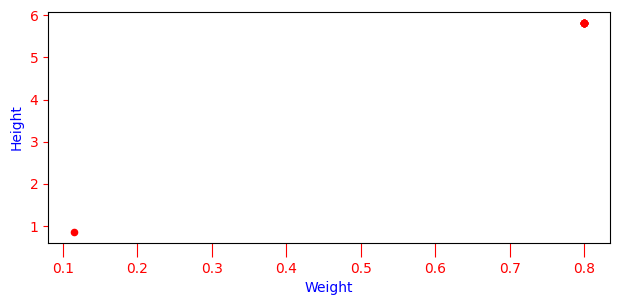

In [3]:
# Data
df = { 
        'x0': df_results['OF_0'],
        'y0': df_results['OF_1'],
     }

# Chart setup
chart_config = {
                'name': 'figure1-3-1',
                'width': 16, 
                'height': 8,
                'dots_per_inch': 600, 
                'extension': 'svg',
                'marker_size': [20],
                'color_map': ['red', 'blue'],
                'x_axis_label': 'Weight',
                'x_axis_size': 10,
                'y_axis_label': 'Height',
                'y_axis_size': 10,
                'axises_color': 'red', 
                'labels_size': 10,
                'labels_color': 'blue',
                'on_grid': False,
                'y_log': False,
                'x_log': False,
                'legend': [None],
                'legend_location': None,
                'size_legend': 12,
               }

# Call function
scatter_chart(dataset=df, plot_setup=chart_config)